In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/ai_job_dataset.csv')
df.head()

job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India            50   
4          Singapore           100   

                                   required_skills education_required  \
0         Tableau, PyTorch, Kubernetes, Linux, NLP           Bachelor   
1  Deep Learning, AWS, Mathematics, Python, Docker             Master   
2     Kubernetes, Deep Learning, Java, Hadoop, NLP          Associate   
3                        Scala, SQL, Linux, Python                PhD   
4                     MLOps, Java, Tableau, Python             Master   

   years_experience    industry posting_date application_deadline  \
0                 9  Automotive   18-10-2024           07-11-2024   
1                 1       Media   20-11-2024           11-01-2025   
2                 2   Education   18-03-2025           07-04-2025   
3                 7  Consulting   23-12-2024           24-02-2025   
4                 0       Media   15-04-2025           23-06-2025   

   job_description_length  benefits_score       company_name  
0                    1076             5.9    Smart Analytics  
1                    1268             5.2       TechCorp Inc  
2                    1974             9.4    Autonomous Tech  
3                    1345             8.6     Future Systems  
4                    1989             6.6  Advanced Robotics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [ ]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [ ]:
df.nunique()

job_id                    15000
job_title                    20
salary_usd                14315
salary_currency               3
experience_level              4
employment_type               4
company_location             20
company_size                  3
employee_residence           20
remote_ratio                  3
required_skills           13663
education_required            4
years_experience             20
industry                     15
posting_date                486
application_deadline        543
job_description_length     2000
benefits_score               51
company_name                 16
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%d-%m-%Y')
df['application_deadline'] = pd.to_datetime(df['application_deadline'], format='%d-%m-%Y')


We convert the posting_date and application_deadline columns to datetime format so we can extract useful date-based features like year, month, or time difference between dates

In [ ]:
df['days_until_deadline'] = (df['application_deadline'] - df['posting_date']).dt.days
df['posting_month'] = df['posting_date'].dt.month
df['deadline_month'] = df['application_deadline'].dt.month


# **1.  days_until_deadline**

A job with short deadlines may be urgent → company may offer higher pay

A job open for longer duration might be lower urgency → may offer lower salary

So it can influence salary

 ---> Useful feature for modeling

# **2. posting_month & deadline_month**

Salaries in tech fluctuate across months, especially in:

Q1 hiring spikes

End-of-year freezes

Companies in the US/EU often follow fiscal cycles

---> Can capture seasonal salary patterns

In [ ]:
df.head()

job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  ... years_experience    industry  \
0              China            50  ...                9  Automotive   
1            Ireland           100  ...                1       Media   
2        South Korea             0  ...                2   Education   
3              India            50  ...                7  Consulting   
4          Singapore           100  ...                0       Media   

   posting_date application_deadline job_description_length benefits_score  \
0    2024-10-18           2024-11-07                   1076            5.9   
1    2024-11-20           2025-01-11                   1268            5.2   
2    2025-03-18           2025-04-07                   1974            9.4   
3    2024-12-23           2025-02-24                   1345            8.6   
4    2025-04-15           2025-06-23                   1989            6.6   

        company_name  days_until_deadline posting_month  deadline_month  
0    Smart Analytics                   20            10              11  
1       TechCorp Inc                   52            11               1  
2    Autonomous Tech                   20             3               4  
3     Future Systems                   63            12               2  
4  Advanced Robotics                   69             4               6  

[5 rows x 22 columns]

In [ ]:
df['posting_year'] = df['posting_date'].dt.year
df['is_short_deadline'] = df['days_until_deadline'] < 10


**posting_year** helps identify salary trends over time (2024 vs 2025),
 and **is_short_deadline** is a binary feature showing if a job has an urgent deadline, which may indicate higher pay or rush hiring.

In [ ]:
df.drop(['posting_date', 'application_deadline'], axis=1, inplace=True)


In [ ]:
print(df.columns.tolist())


['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'job_description_length', 'benefits_score', 'company_name', 'days_until_deadline', 'posting_month', 'deadline_month', 'posting_year', 'is_short_deadline']


Outlier Detection BOX PLOT

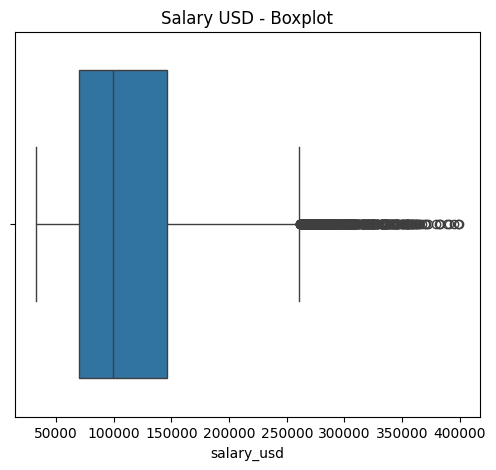

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(x=df['salary_usd'])
plt.title("Salary USD - Boxplot")
plt.show()

In [ ]:
q_high = df['salary_usd'].quantile(0.99)
df = df[df['salary_usd'] < q_high]

# **column wise analysis and encoding**

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


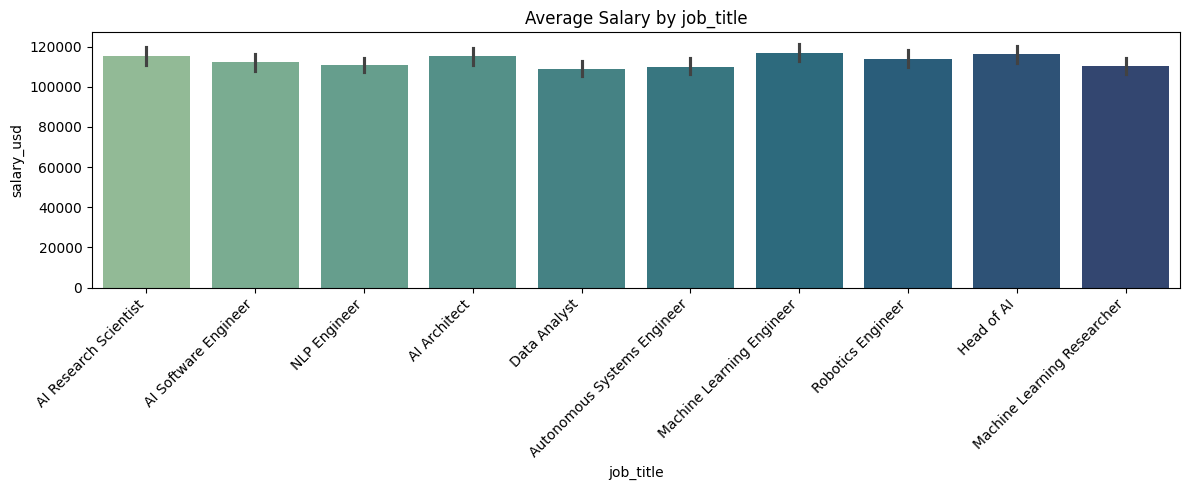

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


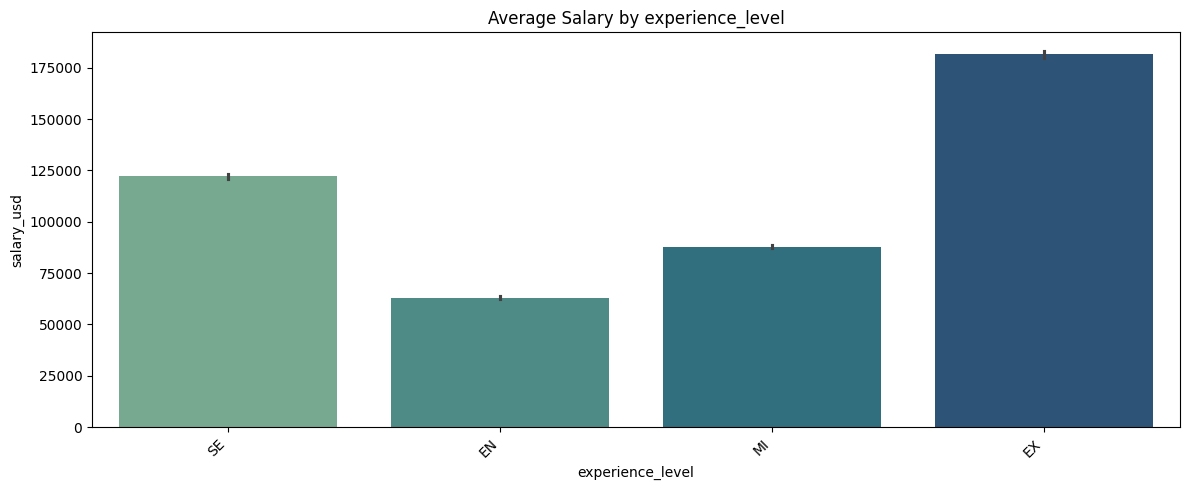

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


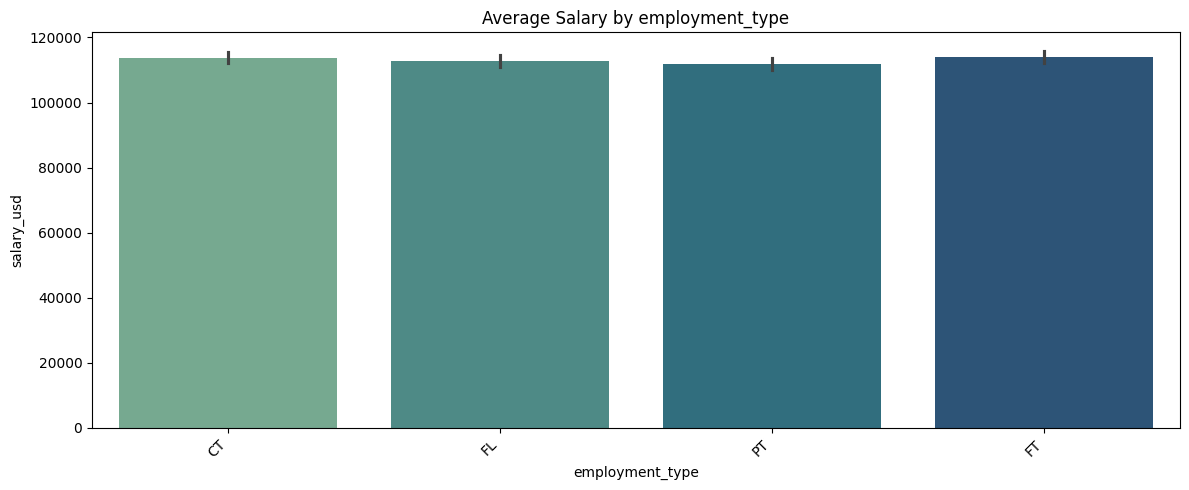

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


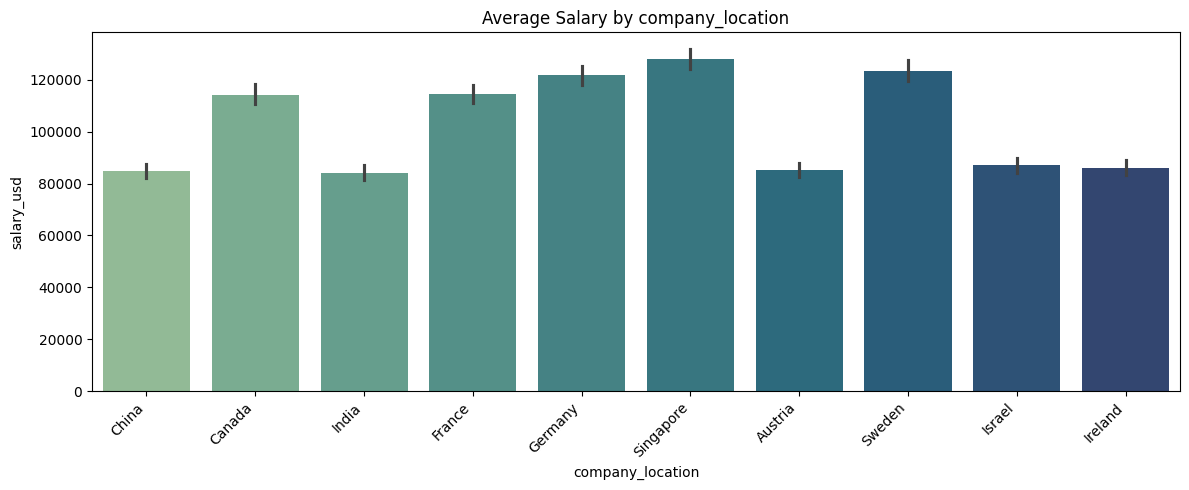

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


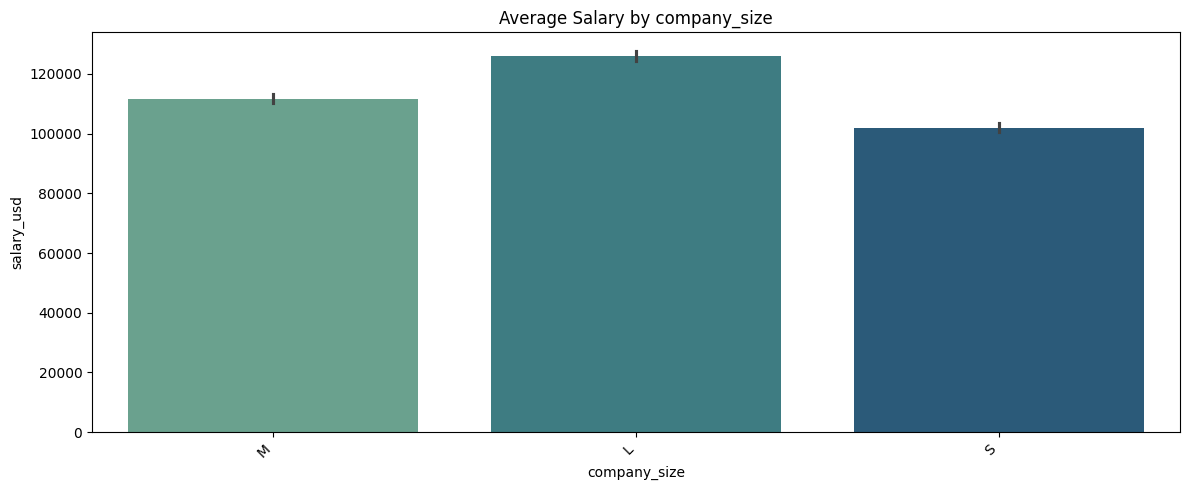

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


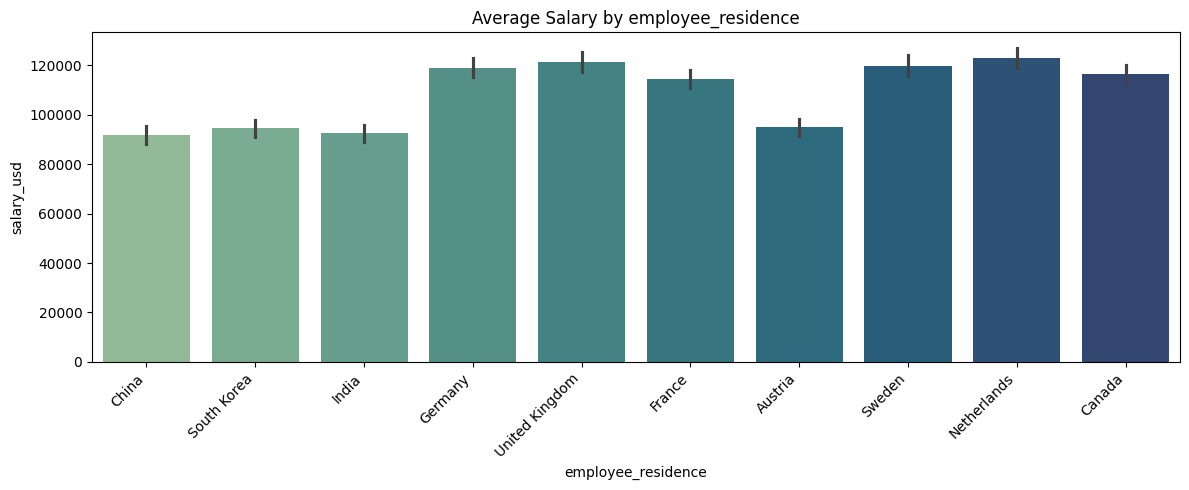

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


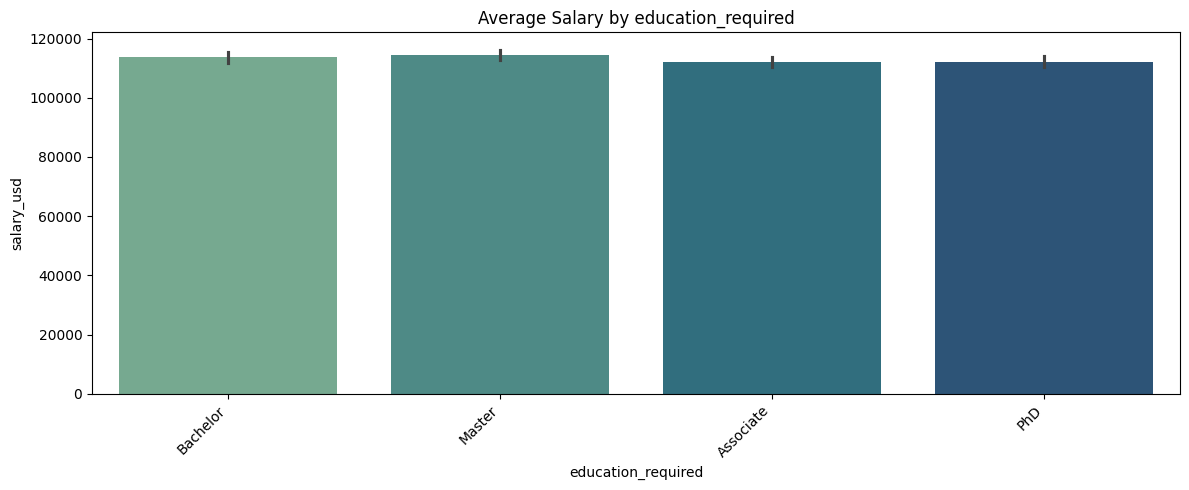

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


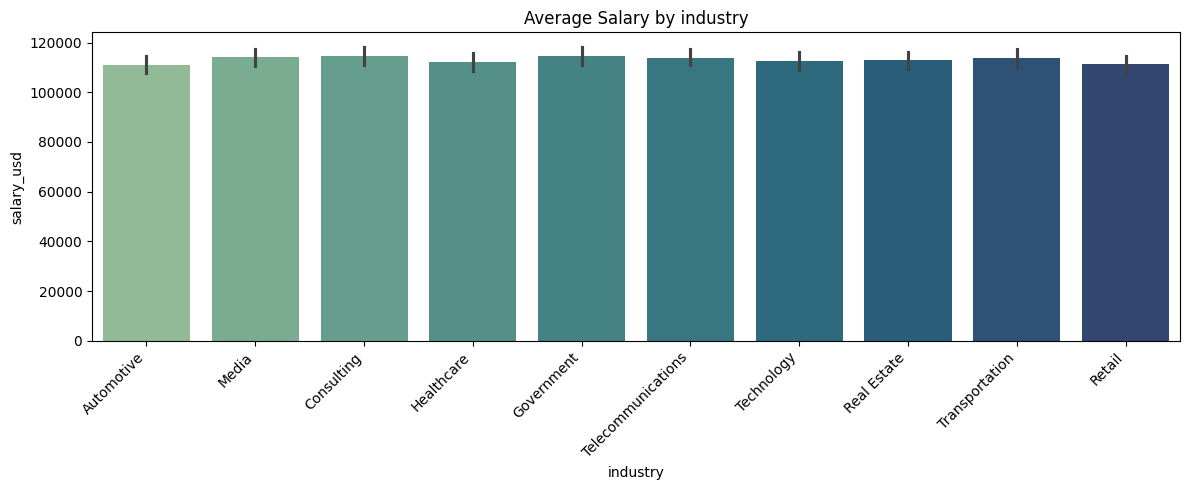

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


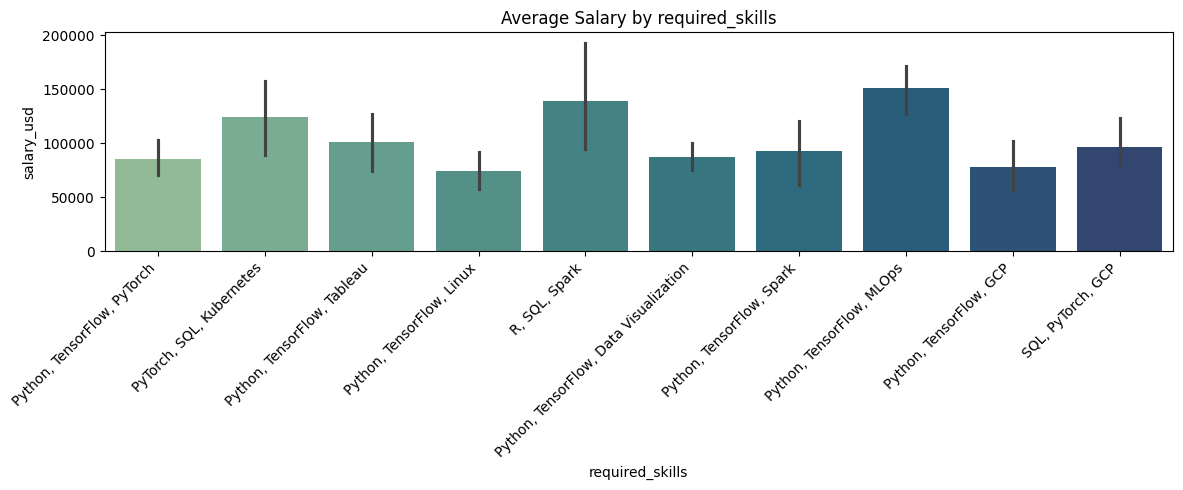

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


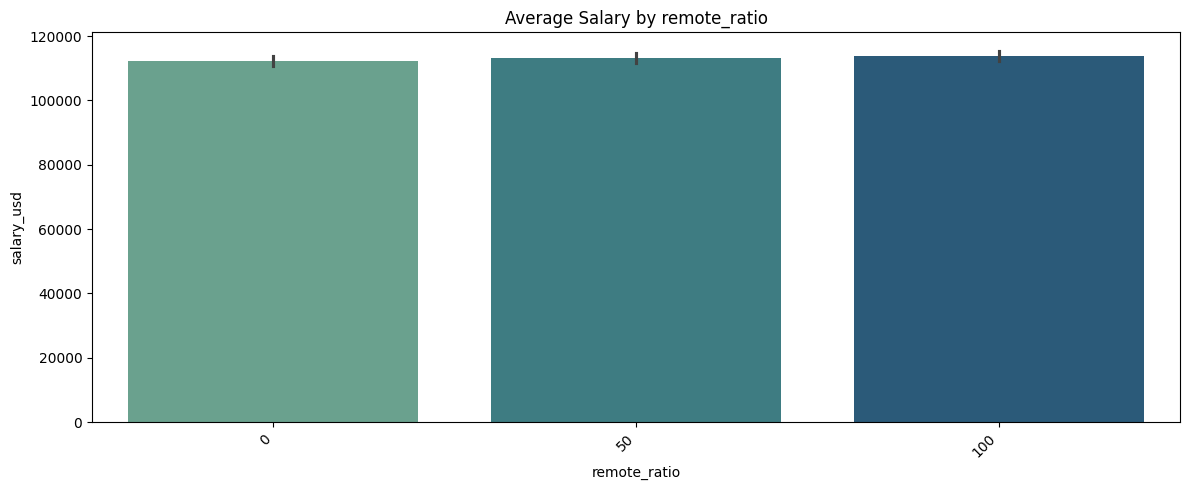

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


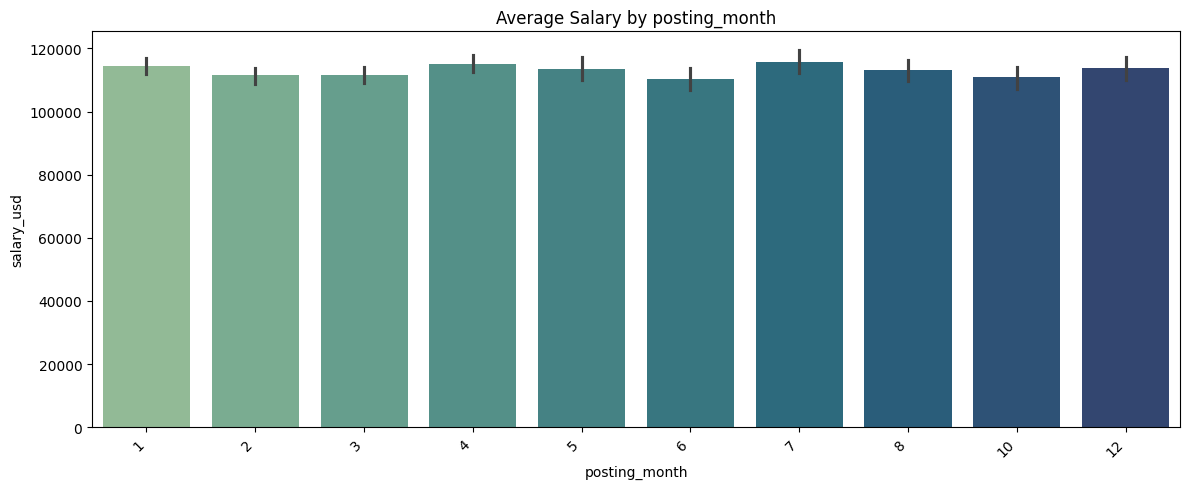

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


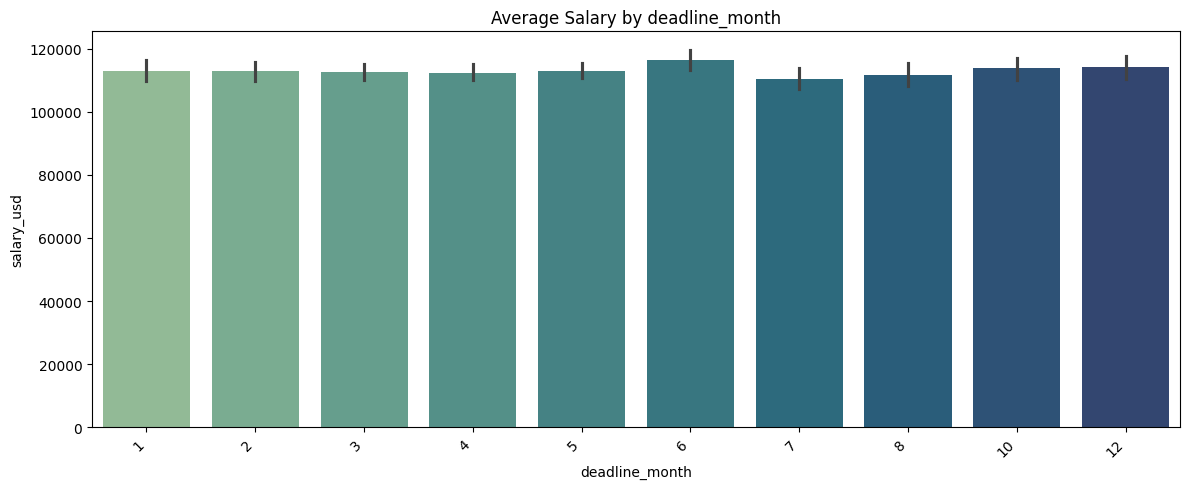

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


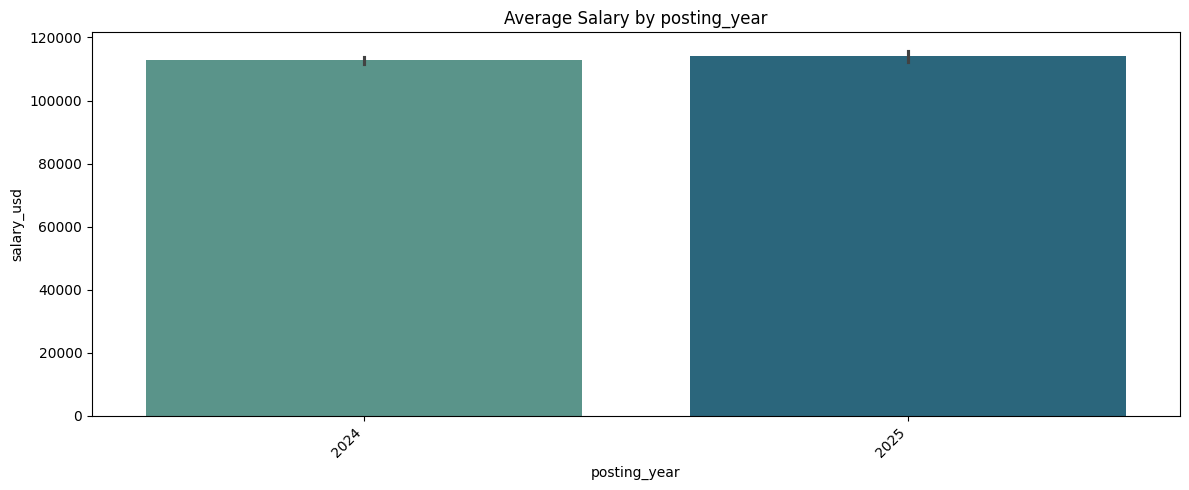

/tmp/ipython-input-15-504006810.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')


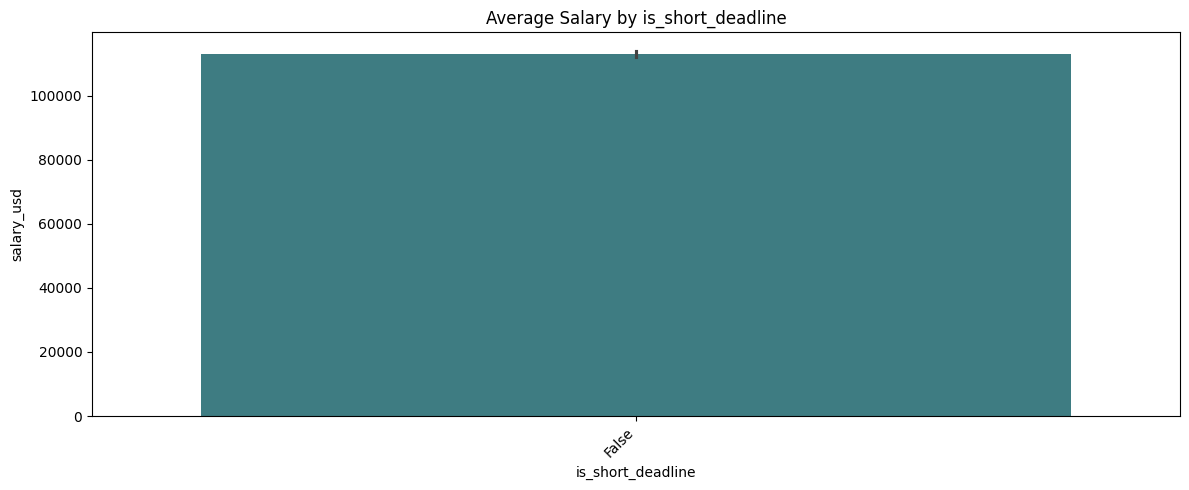

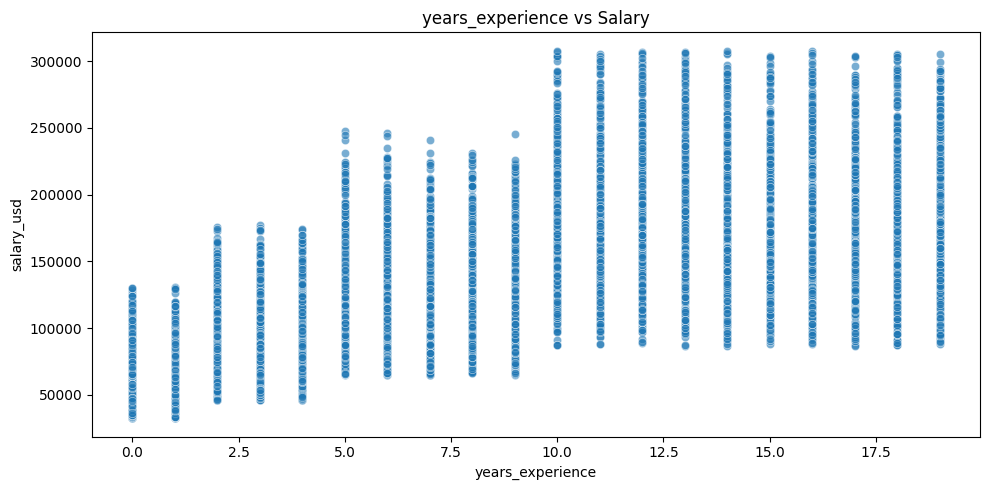

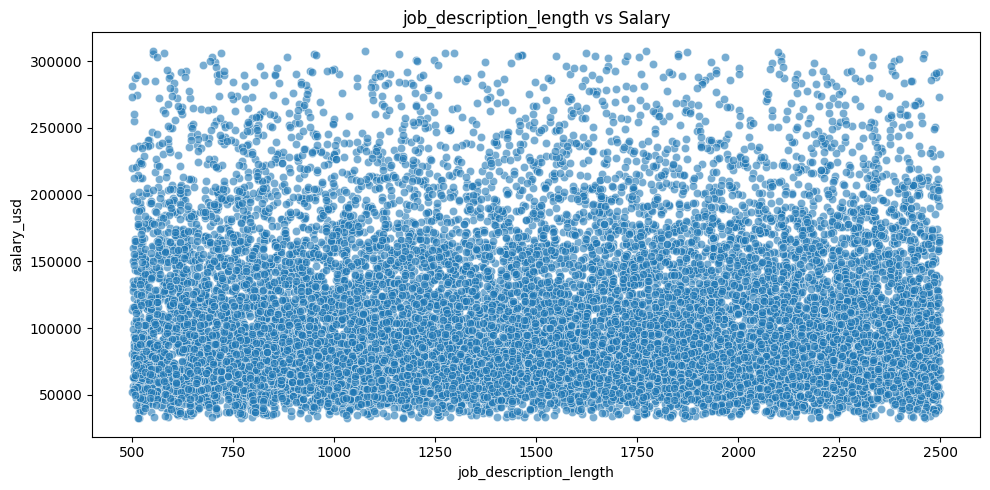

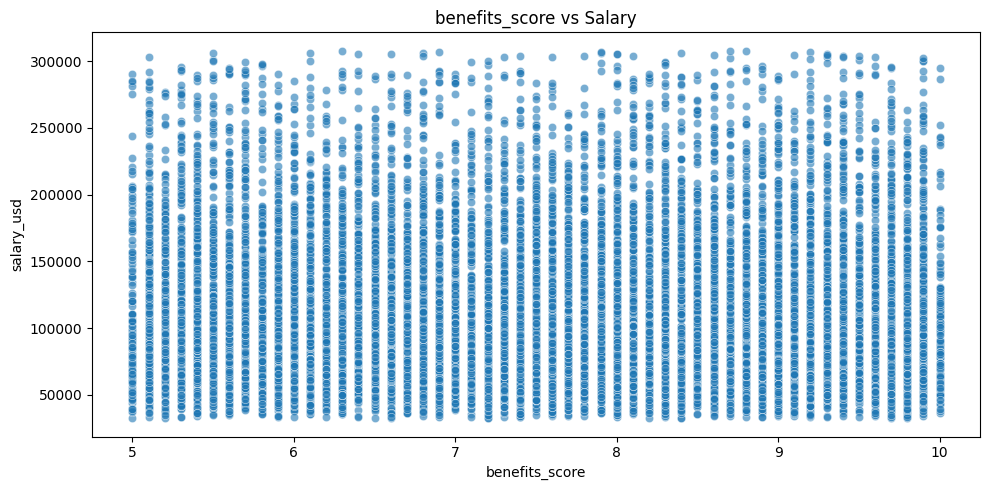

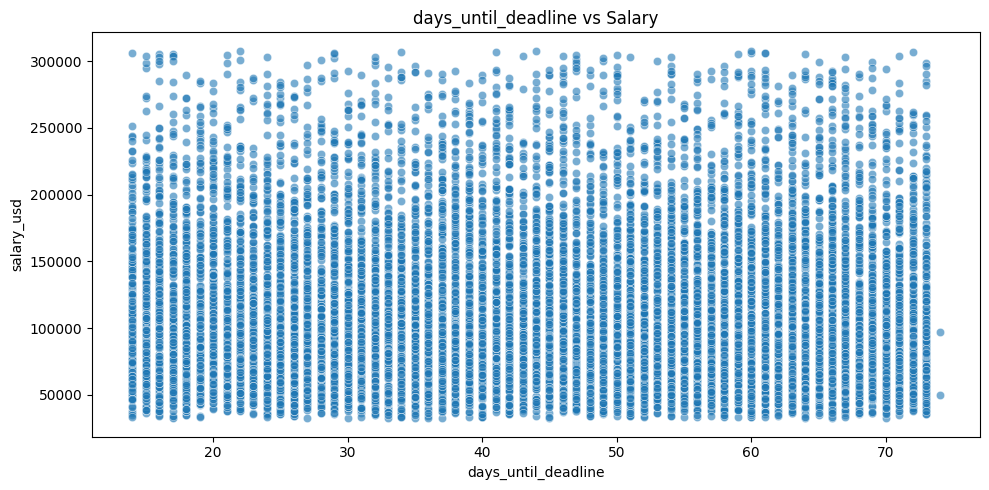

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = [
    'job_title', 'experience_level', 'employment_type', 'company_location',
    'company_size', 'employee_residence', 'education_required', 'industry',
    'required_skills', 'remote_ratio', 'posting_month', 'deadline_month',
    'posting_year', 'is_short_deadline'
]

numerical_cols = [
    'years_experience', 'job_description_length', 'benefits_score',
    'days_until_deadline'
]

# Categorical: barplots vs salary
for col in categorical_cols:
    plt.figure(figsize=(12, 5))
    top_categories = df[col].value_counts().index[:10]
    sns.barplot(data=df[df[col].isin(top_categories)], x=col, y='salary_usd', palette='crest')
    plt.title(f'Average Salary by {col} (Top 10)' if len(top_categories) > 10 else f'Average Salary by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=col, y='salary_usd', alpha=0.6)
    plt.title(f'{col} vs Salary')
    plt.tight_layout()
    plt.show()


Checking value counts for each categorical column to understand:

How many unique values exist

Whether the data is balanced or skewed

Which encoding method we might apply later

In [ ]:
df.drop([ 'job_id'], axis=1, inplace=True)


In [ ]:
df['job_title'].value_counts()

job_title
Machine Learning Researcher    800
AI Software Engineer           777
Autonomous Systems Engineer    772
Machine Learning Engineer      764
AI Architect                   764
Head of AI                     757
NLP Engineer                   756
Data Analyst                   751
Robotics Engineer              750
AI Research Scientist          748
Data Engineer                  745
Research Scientist             735
AI Product Manager             734
Principal Data Scientist       727
ML Ops Engineer                717
AI Specialist                  716
Data Scientist                 715
Computer Vision Engineer       714
Deep Learning Engineer         707
AI Consultant                  701
Name: count, dtype: int64

Since the number of categories is small (20), we can use One-Hot Encoding — it won’t explode the feature space and will allow the model to treat each job title separately without imposing any ordinal relationship.

In [ ]:
df['salary_currency'].value_counts()

salary_currency
USD    11809
EUR     2313
GBP      728
Name: count, dtype: int64

/tmp/ipython-input-19-3569541654.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='salary_currency', palette='pastel')


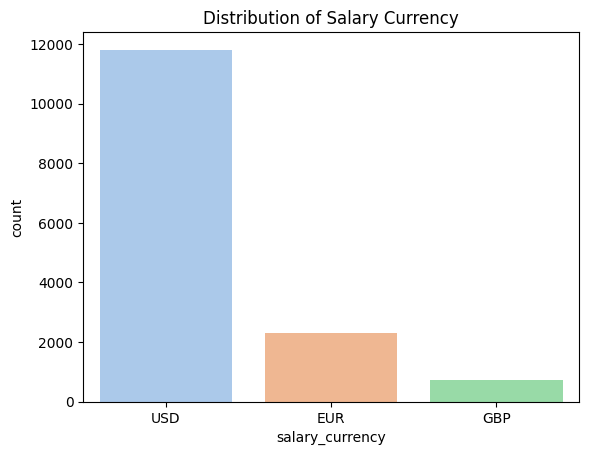

In [ ]:
sns.countplot(data=df, x='salary_currency', palette='pastel')
plt.title('Distribution of Salary Currency')
plt.show()


This column doesn’t add predictive power, just explains original source so
Drop this column from modeling. It’s redundant since salary_usd is already provided and used as the target.

In [ ]:
df.drop(['salary_currency'], axis=1, inplace=True)


In [ ]:
df.head()

job_title  salary_usd experience_level employment_type  \
0  AI Research Scientist       90376               SE              CT   
1   AI Software Engineer       61895               EN              CT   
2          AI Specialist      152626               MI              FL   
3           NLP Engineer       80215               SE              FL   
4          AI Consultant       54624               EN              PT   

  company_location company_size employee_residence  remote_ratio  \
0            China            M              China            50   
1           Canada            M            Ireland           100   
2      Switzerland            L        South Korea             0   
3            India            M              India            50   
4           France            S          Singapore           100   

                                   required_skills education_required  \
0         Tableau, PyTorch, Kubernetes, Linux, NLP           Bachelor   
1  Deep Learning, AWS, Mathematics, Python, Docker             Master   
2     Kubernetes, Deep Learning, Java, Hadoop, NLP          Associate   
3                        Scala, SQL, Linux, Python                PhD   
4                     MLOps, Java, Tableau, Python             Master   

   years_experience    industry  job_description_length  benefits_score  \
0                 9  Automotive                    1076             5.9   
1                 1       Media                    1268             5.2   
2                 2   Education                    1974             9.4   
3                 7  Consulting                    1345             8.6   
4                 0       Media                    1989             6.6   

        company_name  days_until_deadline  posting_month  deadline_month  \
0    Smart Analytics                   20             10              11   
1       TechCorp Inc                   52             11               1   
2    Autonomous Tech                   20              3               4   
3     Future Systems                   63             12               2   
4  Advanced Robotics                   69              4               6   

   posting_year  is_short_deadline  
0          2024              False  
1          2024              False  
2          2025              False  
3          2024              False  
4          2025              False

In [ ]:
df.shape

(14850, 20)

In [ ]:
df['experience_level'].value_counts()


experience_level
MI    3781
SE    3741
EN    3718
EX    3610
Name: count, dtype: int64

EN = Entry

MI = Mid

SE = Senior

EX = Executive

/tmp/ipython-input-24-3027475693.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='experience_level', palette='muted')


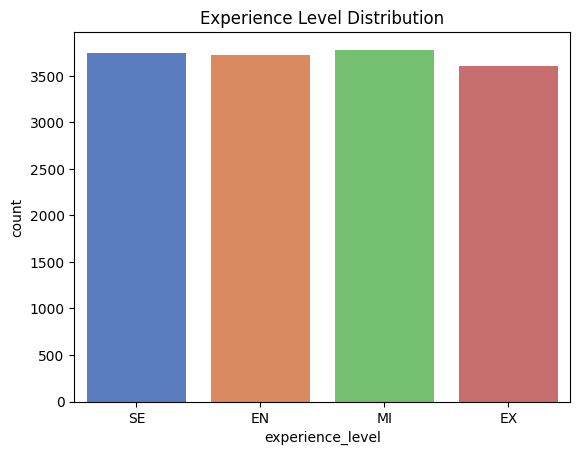

In [ ]:
sns.countplot(data=df, x='experience_level', palette='muted')
plt.title('Experience Level Distribution')
plt.show()


In [ ]:
df['experience_level'] = df['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})


In [ ]:
df.head()

job_title  salary_usd  experience_level employment_type  \
0  AI Research Scientist       90376                 2              CT   
1   AI Software Engineer       61895                 0              CT   
2          AI Specialist      152626                 1              FL   
3           NLP Engineer       80215                 2              FL   
4          AI Consultant       54624                 0              PT   

  company_location company_size employee_residence  remote_ratio  \
0            China            M              China            50   
1           Canada            M            Ireland           100   
2      Switzerland            L        South Korea             0   
3            India            M              India            50   
4           France            S          Singapore           100   

                                   required_skills education_required  \
0         Tableau, PyTorch, Kubernetes, Linux, NLP           Bachelor   
1  Deep Learning, AWS, Mathematics, Python, Docker             Master   
2     Kubernetes, Deep Learning, Java, Hadoop, NLP          Associate   
3                        Scala, SQL, Linux, Python                PhD   
4                     MLOps, Java, Tableau, Python             Master   

   years_experience    industry  job_description_length  benefits_score  \
0                 9  Automotive                    1076             5.9   
1                 1       Media                    1268             5.2   
2                 2   Education                    1974             9.4   
3                 7  Consulting                    1345             8.6   
4                 0       Media                    1989             6.6   

        company_name  days_until_deadline  posting_month  deadline_month  \
0    Smart Analytics                   20             10              11   
1       TechCorp Inc                   52             11               1   
2    Autonomous Tech                   20              3               4   
3     Future Systems                   63             12               2   
4  Advanced Robotics                   69              4               6   

   posting_year  is_short_deadline  
0          2024              False  
1          2024              False  
2          2025              False  
3          2024              False  
4          2025              False

In [ ]:
df['employment_type'].value_counts()


employment_type
FT    3772
FL    3721
CT    3685
PT    3672
Name: count, dtype: int64

FT = Full-time

PT = Part-time

CT = Contract

FL = Freelance

/tmp/ipython-input-28-3289313161.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='employment_type', palette='husl')


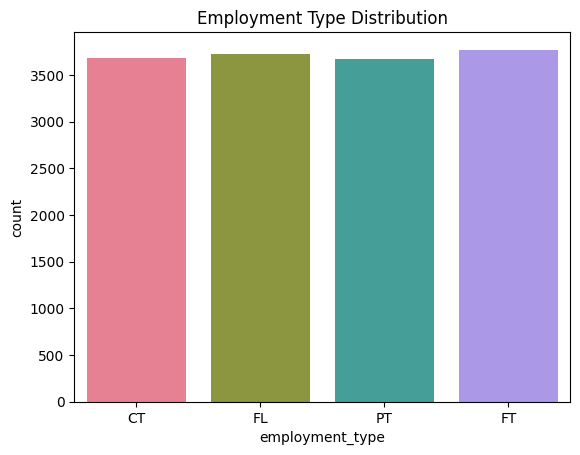

In [ ]:
sns.countplot(data=df, x='employment_type', palette='husl')
plt.title('Employment Type Distribution')
plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['employment_type'], prefix='emp')


Applied One-Hot Encoding to employment_type since the values are nominal (FT, PT, CT, FL) and equally important in salary prediction. This avoids introducing false ordinal relationships.



In [ ]:
df['company_location'].value_counts()


company_location
Germany           814
Canada            769
France            769
Austria           765
Singapore         764
China             763
India             754
Sweden            752
Israel            751
Ireland           750
Japan             733
Finland           733
Denmark           732
Australia         732
Netherlands       730
United Kingdom    728
South Korea       722
United States     708
Norway            692
Switzerland       689
Name: count, dtype: int64

/tmp/ipython-input-31-1817553970.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='company_location', order=df['company_location'].value_counts().index[:10], palette='viridis')


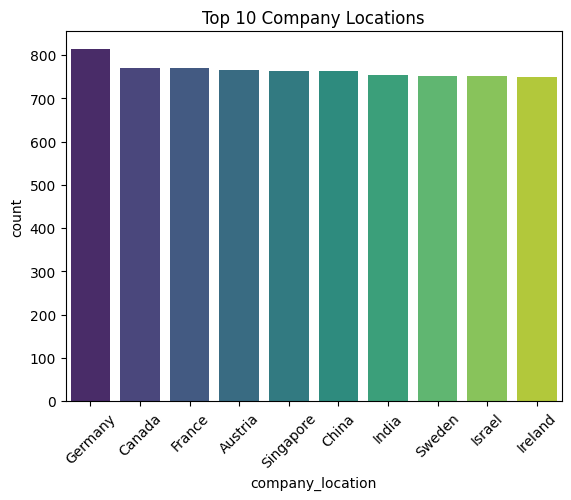

In [ ]:
sns.countplot(data=df, x='company_location', order=df['company_location'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Company Locations')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['company_location'], prefix='comp_loc')


Applied One-Hot Encoding to company_location since the column has 20 well-distributed country categories and no ordinal relationship. Country plays a major role in salary differences across the world.

In [ ]:
df['company_size'].value_counts()


company_size
S    5003
M    4952
L    4895
Name: count, dtype: int64

S = Small (< 50 employees)

M = Medium (50–250)

L = Large (> 250)

/tmp/ipython-input-34-1508146843.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='company_size', palette='coolwarm')


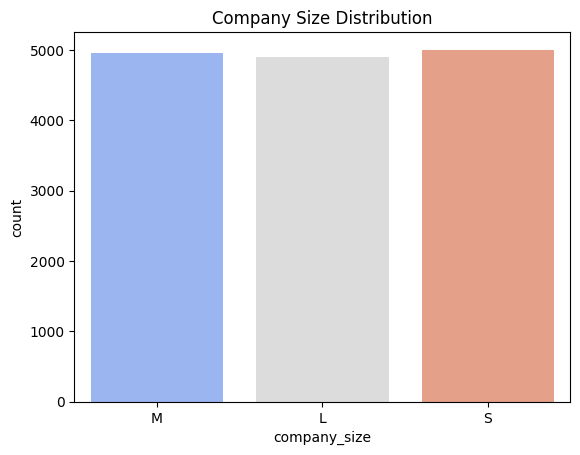

In [ ]:
sns.countplot(data=df, x='company_size', palette='coolwarm')
plt.title('Company Size Distribution')
plt.show()


In [ ]:
df['company_size'] = df['company_size'].map({'S': 0, 'M': 1, 'L': 2})


Used label encoding for company_size since it has a clear ordinal structure (S < M < L). This allows the model to learn the increasing effect of company size on salary.

In [ ]:
df['remote_ratio'].describe()

count    14850.000000
mean        49.447811
std         40.826593
min          0.000000
25%          0.000000
50%         50.000000
75%        100.000000
max        100.000000
Name: remote_ratio, dtype: float64

/tmp/ipython-input-37-1102858767.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='remote_ratio', palette='Blues')


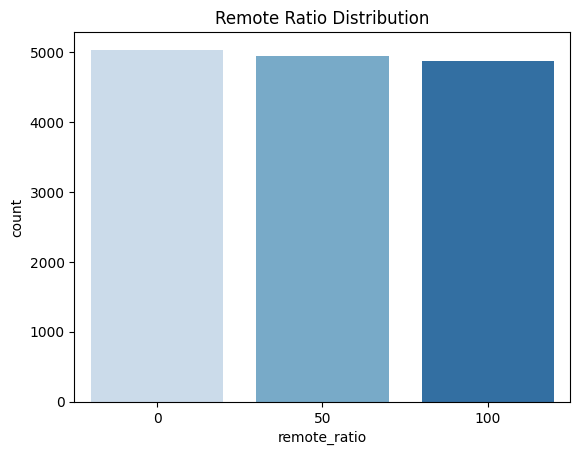

In [ ]:
sns.countplot(data=df, x='remote_ratio', palette='Blues')
plt.title('Remote Ratio Distribution')
plt.show()


In [ ]:
df['employee_residence'].value_counts()


employee_residence
Sweden            787
France            780
Austria           770
India             769
Germany           768
China             760
South Korea       760
Canada            756
Netherlands       756
United Kingdom    748
Singapore         739
Denmark           738
Ireland           737
Israel            728
Australia         728
Switzerland       711
Finland           709
Norway            707
United States     703
Japan             696
Name: count, dtype: int64

/tmp/ipython-input-39-4077028395.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='employee_residence', order=df['employee_residence'].value_counts().index[:10], palette='Spectral')


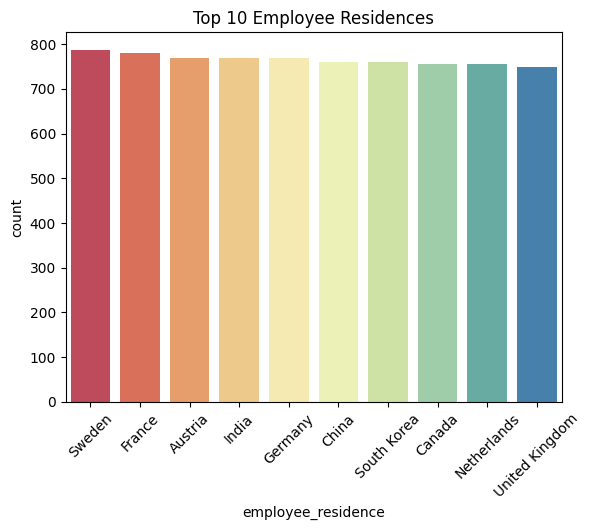

In [ ]:
sns.countplot(data=df, x='employee_residence', order=df['employee_residence'].value_counts().index[:10], palette='Spectral')
plt.title('Top 10 Employee Residences')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['employee_residence'], prefix='emp_res')


Applied One-Hot Encoding to employee_residence to capture the influence of where the employee lives. Remote work compensation often depends on the employee's location.

In [ ]:
df['required_skills']


0               Tableau, PyTorch, Kubernetes, Linux, NLP
1        Deep Learning, AWS, Mathematics, Python, Docker
2           Kubernetes, Deep Learning, Java, Hadoop, NLP
3                              Scala, SQL, Linux, Python
4                           MLOps, Java, Tableau, Python
                              ...                       
14995                            Java, Kubernetes, Azure
14996            Mathematics, Docker, SQL, Deep Learning
14997                                  Scala, Spark, NLP
14998          Java, Computer Vision, Python, TensorFlow
14999      Scala, Azure, Deep Learning, GCP, Mathematics
Name: required_skills, Length: 14850, dtype: object

In [ ]:
from collections import Counter

# Cleanly split and flatten all skills
all_skills = []
for skills in df['required_skills']:
    if isinstance(skills, str):
        all_skills.extend([skill.strip() for skill in skills.split(',')])

# Count the top 20 most frequent skills
top_skills = Counter(all_skills).most_common(20)
top_skills


[('Python', 4403),
 ('SQL', 3371),
 ('TensorFlow', 2990),
 ('Kubernetes', 2982),
 ('Scala', 2764),
 ('PyTorch', 2748),
 ('Linux', 2678),
 ('Git', 2606),
 ('Java', 2552),
 ('GCP', 2418),
 ('Hadoop', 2395),
 ('Tableau', 2315),
 ('R', 2294),
 ('Computer Vision', 2259),
 ('Data Visualization', 2255),
 ('Deep Learning', 2169),
 ('MLOps', 2147),
 ('Spark', 2131),
 ('Azure', 2125),
 ('NLP', 2122)]

Safely parsed all required_skills by splitting only valid strings, stripping extra spaces, and collecting them into a list. Then counted the top 20 most common skills.

In [ ]:
top_20_skills = [skill for skill, _ in top_skills]

for skill in top_20_skills:
    skill_col = f'has_{skill.replace(" ", "_")}'
    df[skill_col] = df['required_skills'].apply(lambda x: int(isinstance(x, str) and skill in x))


Created binary columns for the top 20 most frequent skills in the dataset. These columns indicate whether a specific skill is required for a job and help the model understand technical demand.

In [ ]:
df.shape

(14850, 81)

In [ ]:
df.head()

job_title  salary_usd  experience_level  company_size  \
0  AI Research Scientist       90376                 2             1   
1   AI Software Engineer       61895                 0             1   
2          AI Specialist      152626                 1             2   
3           NLP Engineer       80215                 2             1   
4          AI Consultant       54624                 0             0   

   remote_ratio                                  required_skills  \
0            50         Tableau, PyTorch, Kubernetes, Linux, NLP   
1           100  Deep Learning, AWS, Mathematics, Python, Docker   
2             0     Kubernetes, Deep Learning, Java, Hadoop, NLP   
3            50                        Scala, SQL, Linux, Python   
4           100                     MLOps, Java, Tableau, Python   

  education_required  years_experience    industry  job_description_length  \
0           Bachelor                 9  Automotive                    1076   
1             Master                 1       Media                    1268   
2          Associate                 2   Education                    1974   
3                PhD                 7  Consulting                    1345   
4             Master                 0       Media                    1989   

   ...  has_Hadoop has_Tableau  has_R  has_Computer_Vision  \
0  ...           0           1      0                    0   
1  ...           0           0      0                    0   
2  ...           1           0      0                    0   
3  ...           0           0      0                    0   
4  ...           0           1      0                    0   

   has_Data_Visualization  has_Deep_Learning  has_MLOps  has_Spark  has_Azure  \
0                       0                  0          0          0          0   
1                       0                  1          0          0          0   
2                       0                  1          0          0          0   
3                       0                  0          0          0          0   
4                       0                  0          1          0          0   

   has_NLP  
0        1  
1        0  
2        1  
3        0  
4        0  

[5 rows x 81 columns]

In [ ]:
df['education_required'].value_counts()


education_required
Bachelor     3753
Associate    3740
Master       3705
PhD          3652
Name: count, dtype: int64

Associate → 0

Bachelor → 1

Master → 2

PhD → 3

/tmp/ipython-input-47-3893166864.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='education_required', palette='mako')


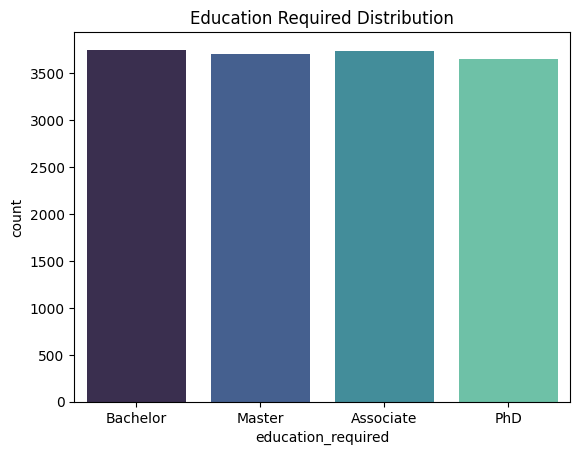

In [ ]:
sns.countplot(data=df, x='education_required', palette='mako')
plt.title('Education Required Distribution')
plt.show()


In [ ]:
df['education_required'] = df['education_required'].map({'Associate': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3})


Encoded education_required using label encoding to reflect the natural progression of academic qualifications. Higher education levels often correspond to higher salaries, so preserving order helps the model.

In [ ]:
df['years_experience'].describe()


count    14850.000000
mean         6.171044
std          5.504292
min          0.000000
25%          1.000000
50%          4.000000
75%          9.000000
max         19.000000
Name: years_experience, dtype: float64

Numerical Column so describe
# years_experience Analysis:

Mean: ~6.3 years

Median (50%): 5 years

Max: 19, Min: 0

No extreme outliers — max is 19, which is realistic in AI jobs

Skew: Slightly right-skewed (but not a problem)

In [ ]:
df['industry'].value_counts()

industry
Retail                1047
Media                 1035
Consulting            1007
Automotive            1006
Technology             997
Real Estate            995
Government             993
Transportation         993
Telecommunications     991
Healthcare             987
Finance                974
Energy                 966
Gaming                 959
Education              950
Manufacturing          950
Name: count, dtype: int64

# Analysis of industry:

15 unique industries

No major imbalance (all around 770–850)

Categories are nominal (no order: "Gaming" ≠ less than "Finance")

Influences salary (e.g., Tech and Finance usually pay more)



In [ ]:
df = pd.get_dummies(df, columns=['industry'], prefix='ind')


Applied One-Hot Encoding to the industry column since it contains unordered industry categories. This allows the model to independently learn salary patterns across different industries.

In [ ]:
df['job_description_length'].describe()


count    14850.000000
mean      1503.152660
std        576.403067
min        500.000000
25%       1003.000000
50%       1511.500000
75%       2001.000000
max       2499.000000
Name: job_description_length, dtype: float64

# job_description_length Analysis:

Range: 500 to 2499 characters

Median ≈ Mean → almost symmetric

No extreme outliers or noise

Higher length could mean more detailed, complex roles → possibly higher salary



In [ ]:
df['benefits_score'].describe()


count    14850.000000
mean         7.503502
std          1.450029
min          5.000000
25%          6.200000
50%          7.500000
75%          8.800000
max         10.000000
Name: benefits_score, dtype: float64

# benefits_score Analysis:

Range: 5.0 to 10.0

Mean ≈ 7.5 — nice centered distribution

No missing or extreme outliers

Higher score likely means higher salary → useful

In [ ]:
df['company_name'].nunique()

16

In [ ]:
df['company_name'].value_counts()

company_name
Cognitive Computing           966
TechCorp Inc                  965
AI Innovations                960
Quantum Computing Inc         951
Digital Transformation LLC    950
Future Systems                946
Cloud AI Solutions            942
Predictive Systems            939
Smart Analytics               923
Advanced Robotics             918
Autonomous Tech               910
Neural Networks Co            909
Machine Intelligence Group    907
DataVision Ltd                900
DeepTech Ventures             889
Algorithmic Solutions         875
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['company_name'], prefix='comp')


Applied One-Hot Encoding to company_name since there are only 16 companies, and company reputation can influence salary. The distribution is balanced enough to include this as a model feature.

In [ ]:
df = df.drop(['job_title', 'required_skills'], axis=1)


# **MIN MAX Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = ['years_experience', 'job_description_length', 'benefits_score', 'days_until_deadline']

df[num_cols] = scaler.fit_transform(df[num_cols])


# Train-Test Split

Training set (80%) — to train the ANN

Test set (20%) — to evaluate model performance

Target Column - salary_usd

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('salary_usd', axis=1)
y = df['salary_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model-1

R² Score (Model 1): 0.8601

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()
model1.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 128)            │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,145 (86.50 KB)

 Trainable params: 22,145 (86.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam


model1.compile(optimizer=Adam(learning_rate=0.005), loss='mae', metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss',
                           patience=4,
                           verbose=1,
                           restore_best_weights=True)

checkpoint = ModelCheckpoint('model1_best.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True)


In [ ]:
history1 = model1.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=100,
                      batch_size=64,
                      callbacks=[early_stop, checkpoint],
                      verbose=1)

Epoch 1/100
131/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81479.7734 - mae: 81479.7734
Epoch 1: val_loss improved from inf to 43474.74219, saving model to model1_best.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 78552.7188 - mae: 78552.7188 - val_loss: 43474.7422 - val_mae: 43474.7422
Epoch 2/100
135/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43320.8555 - mae: 43320.8555
Epoch 2: val_loss improved from 43474.74219 to 43284.19922, saving model to model1_best.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43322.1797 - mae: 43322.1797 - val_loss: 43284.1992 - val_mae: 43284.1992
Epoch 3/100
143/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42463.2500 - mae: 42463.2500
Epoch 3: val_loss did not improve from 43284.19922
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 42489.3008 - mae: 42489.3008 - val_loss: 43592.0195 - val_mae: 43592.0195
Epoch 4/100
135/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42873.9102 - mae: 42873.9102
Epoch 4: val_loss improved from 43284.19

In [ ]:
model1.evaluate(X_test, y_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14966.8779 - mae: 14966.8779


[14990.26953125, 14990.26953125]

In [ ]:
from sklearn.metrics import r2_score
y_pred1 = model1.predict(X_test)

r2 = r2_score(y_test, y_pred1)
print(f"R² Score (Model 1): {r2:.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R² Score (Model 1): 0.8601


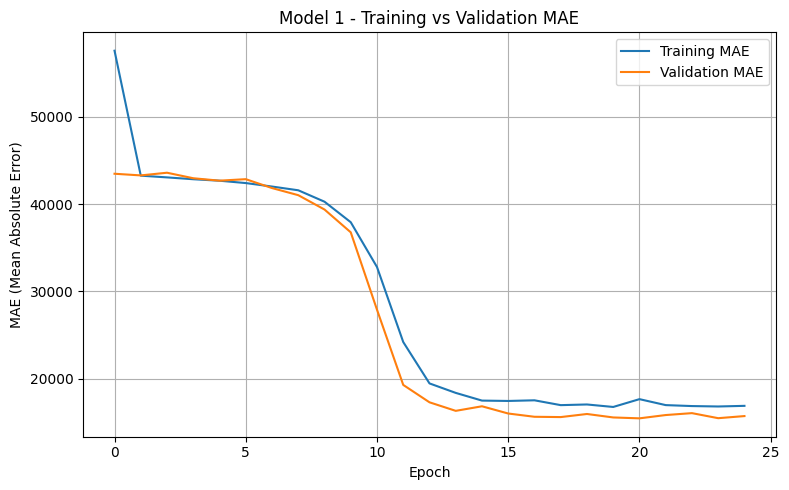

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history1.history['mae'], label='Training MAE')
plt.plot(history1.history['val_mae'], label='Validation MAE')
plt.title('Model 1 - Training vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE (Mean Absolute Error)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Model3**
R² Score (Model 3): 0.8771

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model3 = Sequential()
model3.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,193 (94.50 KB)

 Trainable params: 24,193 (94.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(optimizer='adam', loss='mae', metrics=['mae'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           verbose=1)

checkpoint = ModelCheckpoint('model3_best.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.3,
                              patience=10,
                              min_lr=1e-6,
                              verbose=1)



In [ ]:
history3 = model3.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=100,
                      batch_size=64,
                      callbacks=[early_stop, checkpoint, reduce_lr],
                      verbose=1)



Epoch 1/100
141/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99330.5000 - mae: 99330.5000  
Epoch 1: val_loss improved from inf to 43541.38672, saving model to model3_best.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 97863.8828 - mae: 97863.8828 - val_loss: 43541.3867 - val_mae: 43541.3867 - learning_rate: 0.0010
Epoch 2/100
138/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44132.4531 - mae: 44132.4531
Epoch 2: val_loss did not improve from 43541.38672
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 44065.8711 - mae: 44065.8711 - val_loss: 43817.7656 - val_mae: 43817.7656 - learning_rate: 0.0010
Epoch 3/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42783.2734 - mae: 42783.2734
Epoch 3: val_loss improved from 43541.38672 to 43426.51953, saving model to model3_best.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 42790.6055 - mae: 42790.6055 - val_loss: 43426.5195 - val_mae: 43426.5195 - learning_rate: 0.0010
Epoch 4/100
147/149 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

In [ ]:
model3.evaluate(X_test, y_test)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14550.7168 - mae: 14550.7168


[14385.9326171875, 14385.9326171875]

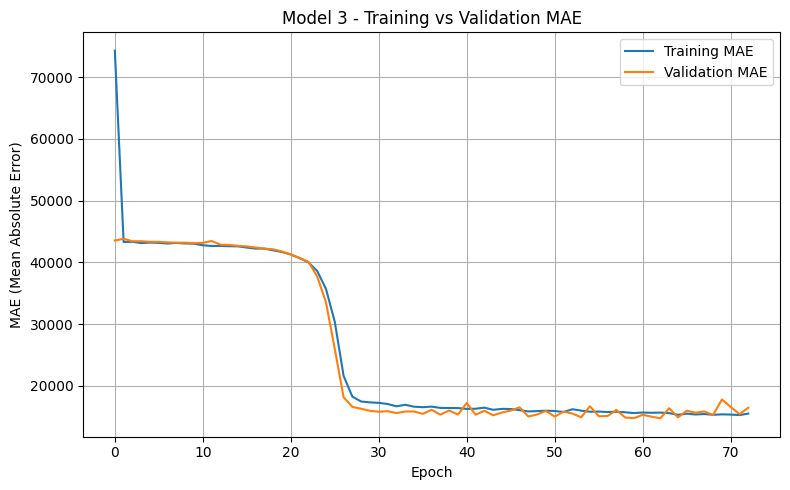

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history3.history['mae'], label='Training MAE')
plt.plot(history3.history['val_mae'], label='Validation MAE')
plt.title('Model 3 - Training vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE (Mean Absolute Error)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
y_pred3 = model3.predict(X_test)


from sklearn.metrics import r2_score
r2_model3 = r2_score(y_test, y_pred3)
print(f"R² Score (Model 3): {r2_model3:.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R² Score (Model 3): 0.8771


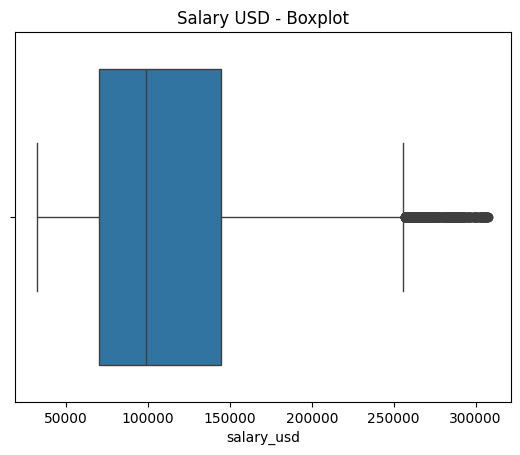

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['salary_usd'])
plt.title("Salary USD - Boxplot")
plt.show()


# **Model 5**

R² Score (Model 5): 0.8828

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model5 = Sequential()
model5.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model5.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 128)            │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,145 (86.50 KB)

 Trainable params: 22,145 (86.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam


model5.compile(optimizer=Adam(learning_rate=0.005), loss='mae', metrics=['mae'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.3,
                              patience=10,
                              verbose=1)

checkpoint = ModelCheckpoint('model5_best.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True)

In [ ]:
history1 = model5.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=100,
                      batch_size=64,
                      callbacks=[early_stop, checkpoint,reduce_lr],
                      verbose=1)

Epoch 1/100
145/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82293.7812 - mae: 82293.7812
Epoch 1: val_loss improved from inf to 43621.70703, saving model to model5_best.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 81507.9219 - mae: 81507.9219 - val_loss: 43621.7070 - val_mae: 43621.7070 - learning_rate: 0.0050
Epoch 2/100
146/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43707.8516 - mae: 43707.8516
Epoch 2: val_loss improved from 43621.70703 to 43302.43750, saving model to model5_best.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43701.4219 - mae: 43701.4219 - val_loss: 43302.4375 - val_mae: 43302.4375 - learning_rate: 0.0050
Epoch 3/100
135/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43003.2539 - mae: 43003.2539
Epoch 3: val_loss improved from 43302.43750 to 43227.10938, saving model to model5_best.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43033.4688 - mae: 43033.4688 - val_loss: 43227.1094 - val_mae: 43227.1094 - learning_rate: 0.0050
Epoch 4/100
138

In [ ]:
model5.evaluate(X_test, y_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14108.0830 - mae: 14108.0830


[14030.8701171875, 14030.8701171875]

In [ ]:

from sklearn.metrics import r2_score
y_pred5 = model5.predict(X_test)
print(f"R² Score (Model 5): {r2_score(y_test, y_pred5):.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R² Score (Model 5): 0.8828


###  Outlier Removal using Quantile and IQR

In [ ]:


q_high = df['salary_usd'].quantile(0.99)
df = df[df['salary_usd'] < q_high]


Q1 = df['salary_usd'].quantile(0.25)
Q3 = df['salary_usd'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['salary_usd'] >= Q1 - 1.5 * IQR) & (df['salary_usd'] <= Q3 + 1.5 * IQR)]
print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (14425, 108)


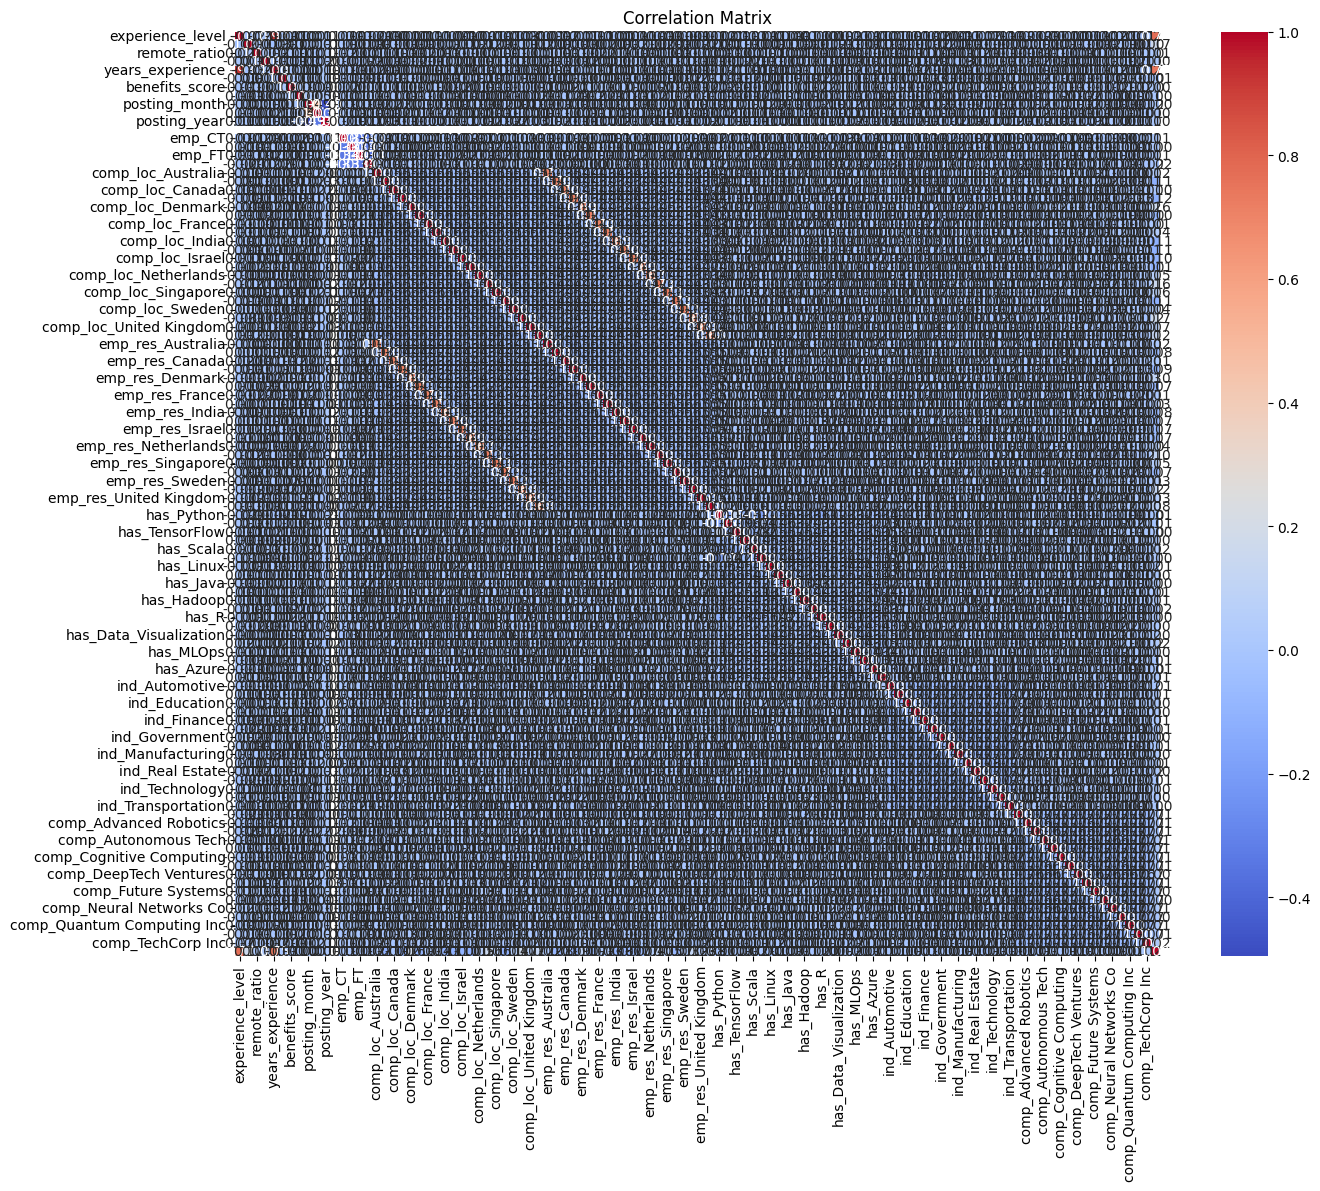

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = X_train.copy()
df_corr['target'] = y_train


corr_matrix = df_corr.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

###  Drop Low-Impact or Redundant Columns

In [ ]:

columns_to_drop = [
    'posting_year',
    'deadline_month',
    'is_short_deadline',
    'job_description_length'
]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['salary_usd', 'experience_level', 'company_size', 'remote_ratio', 'education_required', 'years_experience', 'benefits_score', 'days_until_deadline', 'posting_month', 'emp_CT', 'emp_FL', 'emp_FT', 'emp_PT', 'comp_loc_Australia', 'comp_loc_Austria', 'comp_loc_Canada', 'comp_loc_China', 'comp_loc_Denmark', 'comp_loc_Finland', 'comp_loc_France', 'comp_loc_Germany', 'comp_loc_India', 'comp_loc_Ireland', 'comp_loc_Israel', 'comp_loc_Japan', 'comp_loc_Netherlands', 'comp_loc_Norway', 'comp_loc_Singapore', 'comp_loc_South Korea', 'comp_loc_Sweden', 'comp_loc_Switzerland', 'comp_loc_United Kingdom', 'comp_loc_United States', 'emp_res_Australia', 'emp_res_Austria', 'emp_res_Canada', 'emp_res_China', 'emp_res_Denmark', 'emp_res_Finland', 'emp_res_France', 'emp_res_Germany', 'emp_res_India', 'emp_res_Ireland', 'emp_res_Israel', 'emp_res_Japan', 'emp_res_Netherlands', 'emp_res_Norway', 'emp_res_Singapore', 'emp_res_South Korea', 'emp_res_Sweden', 'emp_res_Switzerland', 'emp_res_

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import numpy as np

X = df.drop(['salary_usd'], axis=1)
y = df['salary_usd']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##  Model 7

Model 7 - MAE: 13136.91
Model 7 - RMSE: 17350.83
Model 7 - R² Score: 0.8812

In [ ]:
model7 = Sequential()
model7.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.3))
model7.add(Dense(64, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.2))
model7.add(Dense(32, activation='relu'))
model7.add(Dense(20, activation='relu'))
model7.add(Dense(1))


model7.compile(optimizer='adam', loss='mean_squared_error')


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("model7.keras", monitor='val_loss', save_best_only=True, mode='min', verbose=1)


history7 = model7.fit(X_train, y_train,
                      validation_split=0.2,
                      epochs=100,
                      batch_size=64,
                      callbacks=[reduce_lr, early_stop, checkpoint],
                      verbose=1)


y_pred7 = model7.predict(X_test)
mae7 = mean_absolute_error(y_test, y_pred7)
rmse7 = np.sqrt(mean_squared_error(y_test, y_pred7))
r2_7 = r2_score(y_test, y_pred7)

print(f"Model 7 - MAE: {mae7:.2f}")
print(f"Model 7 - RMSE: {rmse7:.2f}")
print(f"Model 7 - R² Score: {r2_7:.4f}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


132/145 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14070621184.0000
Epoch 1: val_loss improved from inf to 14374407168.00000, saving model to model7.keras
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 14075213824.0000 - val_loss: 14374407168.0000 - learning_rate: 0.0010
Epoch 2/100
137/145 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13997753344.0000
Epoch 2: val_loss improved from 14374407168.00000 to 13207410688.00000, saving model to model7.keras
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13979580416.0000 - val_loss: 13207410688.0000 - learning_rate: 0.0010
Epoch 3/100
136/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12196805632.0000
Epoch 3: val_loss improved from 13207410688.00000 to 8918689792.00000, saving model to model7.keras
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12146204672.0000 - val_loss: 8918689792.0000 - learning_rate: 0.0010
Epoch 4/100
135/145 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7920101376.0000
Epoch 4: val_loss improved from 8918689792.00000 to 32562

# **Model 6**

Model 6: 0.8800


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


model6 = Sequential()
model6.add(Dense(87, input_dim=X_train.shape[1], activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

model6.add(Dense(143, activation='relu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.3))

model6.add(Dense(71, activation='relu'))
model6.add(Dropout(0.2))

model6.add(Dense(39, activation='relu'))

model6.add(Dense(1))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model6.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=20,verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5,verbose=1, min_lr=1e-6)
checkpoint = ModelCheckpoint('model6.keras', monitor='val_loss', save_best_only=True, verbose=1)

In [ ]:
history = model6.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=150,
    batch_size=32,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

Epoch 1/150
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15486234624.0000 - mae: 111171.4141
Epoch 1: val_loss improved from inf to 4993272320.00000, saving model to model6.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 15482607616.0000 - mae: 111153.7500 - val_loss: 4993272320.0000 - val_mae: 58029.5430 - learning_rate: 0.0010
Epoch 2/150
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5755760128.0000 - mae: 58027.7891
Epoch 2: val_loss did not improve from 4993272320.00000
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5749920768.0000 - mae: 57991.9414 - val_loss: 8372985344.0000 - val_mae: 73219.1875 - learning_rate: 0.0010
Epoch 3/150
291/297 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1930772224.0000 - mae: 32558.7637
Epoch 3: val_loss did not improve from 4993272320.00000
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1927782272.0000 - mae: 32534.9551 - val_loss: 818552569856.0000 - val_mae: 844754.5625 - learning_rate: 0.0010
Epoch 4/150
291/297 ━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import r2_score
y_pred = model6.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
print(f"Model 6: {r2:.4f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 6: 0.8800
